In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import matplotlib.ticker as ticker
import datetime
from scipy.fftpack import fft
from math import pi
from sklearn.utils import shuffle
import itertools

In [3]:
def add_fft (divider, data):
    data_fft = 0
    len_data = int(len(data))
    for k in range(divider):
        kk = k+1
        start_ = int(k*(len_data/divider))
        end_ = int(kk*(len_data/divider))
        data_divided = data[start_:end_]
        x = list(range(0, len(data_divided)))
        data_divided=rename_pd(data_divided, start_, end_)
        data_detrended = deleted_trend(x,data_divided,1)
        
        data_kaiser = add_kaiser(data_divided, 4)
        data_kaiser_np = np.array(data_kaiser)
        data_fft_divided = fft(data_kaiser_np)
        
        data_fft = data_fft + data_fft_divided
        if kk == divider:
            data_fft = data_fft/divider
    return(data_fft) 

In [4]:
def find_opt(data):
    
    len_data = int(len(data))
    
    if len_data/5 == round(len_data/5):
        divider = 5  
    elif len_data/4 == round(len_data/4):
        divider = 4  
    else:
        modulo_5 = len_data%5
        modulo_4 = len_data%4
        
        if modulo_5<=modulo_4:
            data = data[0:(len_data-modulo_5)]
            divider = 5
        else:
            data = data[0:(len_data-modulo_4)]
            divider = 4
    len_data = len(data)
    #print(len_data )
    data_x = list(range(0, len_data))
    return divider, data, data_x



In [5]:

def deleted_trend(x,y,n):
    import os
    clear = lambda: os.system('cls')  # On Windows System
    clear()
    a,b = np.polyfit(x, y, n)
    len_x = len(x)
    y_delta_a = []
    y_polyfit_a = []
    for i in range(len_x):
        x_i = int(x[i])
      #  print(y)
        y_int = y['data']
        y_i = y_int[i]
        x_i_2 = x_i^2
        x_i_3 = x_i^3
        y_polyfit_i = a*x_i+b
        y_delta_i = y_i - y_polyfit_i
        y_delta_a.append(y_delta_i)
        y_polyfit_a.append(y_polyfit_i)
    y_delta_df = pd.DataFrame(y_delta_a)
    y_delta = y_delta_df.rename(columns={0: "data"})
    return(y_delta, y_polyfit_a)


In [6]:
def add_kaiser (data, beta):
    len_data = len(data)
    array_kaiser = np.kaiser(len_data, beta)
    segment_kaiser = array_kaiser*data['data']
    
    return (segment_kaiser)

In [7]:
def power (data):
    data_power = []
    len_data = int(len(data))
    a = 0
    if round(len_data/2) == len_data/2:
        i_len = int(len_data/2)
        a = 1
    else:
        i_len = (len_data+1)/2
    i_len=int(i_len)
    for i in range(i_len):
        if a == 0:
            if i!=i_len-1:
                i_con = data[i]
                i_end = len_data-i-1
                i_end_data = data [i_end]
                data_power.append(i_end_data*i_con)
              #  print(i_end_data*i_con)
            else:
                data_i = float(data[i])
                data_power.append(data_i*data_i)
              #  print(i_end_data*i_con)
        else:
            #i_con = data[i].conjugate()
            i_con = data[i]
            i_end = len_data-i-1
            i_end_data = data [i_end]
            data_power.append(i_end_data*i_con)
           # print(i_end_data*i_con)
            
    #print(data_power)
    #data_power = list(reversed(data_power))
    #print('----------')
    #print(data_power)
    return (data_power)

    

In [8]:
def rename_pd(data, start_, finish_):
    board = list(range(start_, finish_))
    len_data = len(data)
    for i in range(len_data):
        board_i = int(board[i])
        data = data.rename(index={board_i:i})
    return (data)

In [9]:
def UT_time (start, finish):

    array_time = pd.date_range(start, finish, freq="1min").time
    L_AT = len(array_time)
    tim = []

    for y in range(L_AT):
        time_H = array_time[y].strftime('%H')
        time_M = array_time[y].strftime('%M')
        M_H = str(time_H + time_M)
        tim.append (M_H)
    return (tim)

In [170]:
delta_t = 60
data_A = pd.read_csv('C:/Users/gorar/Desktop/w1/data/AH910324.DAT', names=['data'])
data_I = pd.read_csv('C:/Users/gorar/Desktop/w1/data/IV910324.DAT', names=['data'])
data_T = pd.read_csv('C:/Users/gorar/Desktop/w1/data/TH910324.DAT', names=['data'])
#data from station AMS
data_AMS = pd.read_csv('C:/Users/gorar/Desktop/w1/19910324/19910324/N.AMS', names=['data'])
#cuting
data_AMS = data_AMS.loc[650:810].reset_index(drop =True)

C:\Users\gorar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gorar\anaconda3\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\gorar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gorar\anaconda3\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\gorar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


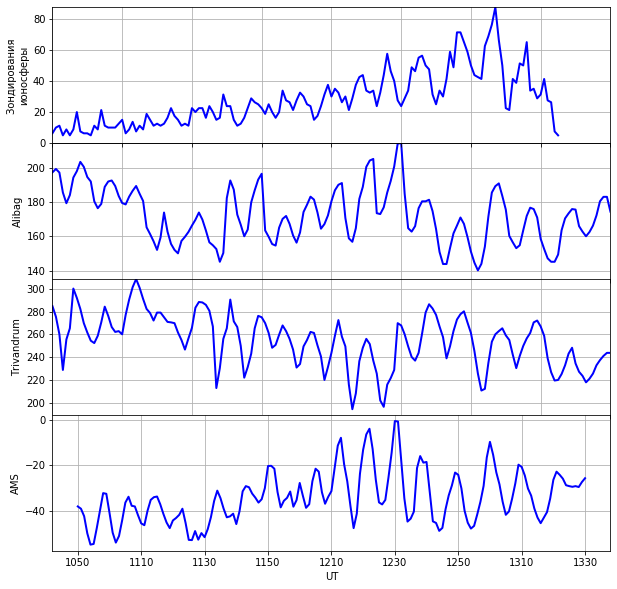

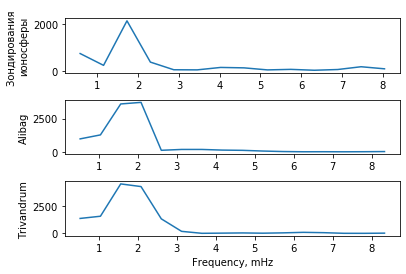

In [171]:
L_A = len(data_A)
L_I = len(data_I)
L_T = len(data_T)

#create array with time
start_time = "10:50"
finish_time = "13:30"

array_time = pd.date_range(start_time, finish_time, freq="1min").time
L_AT = len(array_time)
tim = []

for y in range(L_AT):
    time_H = array_time[y].strftime('%H')
    time_M = array_time[y].strftime('%M')
    M_H = str(time_H + time_M)
    tim.append (M_H)


fig_data = plt.figure(figsize=(10, 10))
fig_data.subplots_adjust(wspace=0, hspace=0)


x_A = list(range(0, L_A))
x_I = list(range(0, L_I))
x_T = list(range(0, L_T))
#Alibag plot
subplot_data_A = fig_data.add_subplot(412)

subplot_data_A.set_xticklabels('')
subplot_data_A.set_ylabel(u'Alibag')

max_A = max(data_A['data'])
min_A = min(data_A['data'])
min_A_border = min_A-5

plt.axis([0, 160, min_A_border, max_A])
line_data_A = subplot_data_A.plot(x_A, data_A, '-', color='blue', linewidth=2)

# ionsphere plot
subplot_data_I = fig_data.add_subplot(411)
subplot_data_I.set_ylabel(u'Зондирования \n'  'ионосферы')

rcParams['figure.subplot.hspace'] = 0.5

max_I = max(data_I['data'])

plt.axis([0, 160, 0, max_I])
subplot_data_I.set_xticklabels('')

line_data_I = subplot_data_I.plot(x_I, data_I, '-', color='blue', linewidth=2)

#trivandrum plot

subplot_data_T = fig_data.add_subplot(413)
subplot_data_T.set_ylabel(u'Trivandrum')


max_T = max(data_T['data'])
min_T = min(data_T['data'])
min_T_border = min_T - 5

plt.axis([0, 160, min_T_border, max_T])
subplot_data_T.set_xticklabels('')
# subplot_data_T.xaxis.set_major_locator(ticker.MultipleLocator(20))

line_data_T = subplot_data_T.plot(x_T, data_T, '-', color='blue', linewidth=2)

#AMS plot

subplot_data_AMS = fig_data.add_subplot(414)
subplot_data_AMS.set_ylabel(u'AMS')
subplot_data_AMS.set_xlabel(u'UT')

max_AMS = max(data_AMS['data'])
min_AMS = min(data_AMS['data'])
min_AMS_border = min_AMS - 5

# plt.axis([0, 160, min_AMS_border, max_AMS])

subplot_data_AMS.xaxis.set_major_locator(ticker.MultipleLocator(20))

line_data_AMS = subplot_data_AMS.plot(tim, data_AMS['data'], '-', color='blue', linewidth=2)
#saving

for ax in fig_data.axes:
    ax.grid(True)
    

path = 'C:/Users/gorar/Desktop/w1/graf'
try:  
    fig_data.savefig(path)
except: 
    print('Ошибка. Введите путь сохранения и имя файла')
    path = input('')
    fig_data.savefig(path)


fig_fft = plt.figure()


devider_I, data_I, x_I = find_opt(data_I)
I_delta, I_polyfit = deleted_trend(x_I, data_I, 1)
fft_I_smoothed = add_fft(devider_I, I_delta)
subplot_fft_I_smoothed = fig_fft.add_subplot(311)
fft_I_smoothed = fft_I_smoothed[1:]
N_I = len(data_I)/devider_I
delta_f = 1000/(delta_t*N_I)

fft_I_power = power(fft_I_smoothed)
x_I_power = list(range(1, len(fft_I_power)+1))
x_I_f = [i * delta_f for i in x_I_power]

subplot_fft_I_smoothed.set_ylabel(u'Зондирования \n'  'ионосферы')

line_fft_I_smoothed = subplot_fft_I_smoothed.plot(x_I_f, fft_I_power)



devider_A, data_A, x_A = find_opt(data_A)
A_delta, A_polyfit = deleted_trend(x_A, data_A, 1)
fft_A_smoothed = add_fft(devider_A, A_delta)      
subplot_fft_A_smoothed = fig_fft.add_subplot(312)
point_A = fft_A_smoothed[0]
fft_A_smoothed = fft_A_smoothed[1:]
fft_A_power = power(fft_A_smoothed)
#print('len(fft_I_smoothed)')
#print(fft_A_smoothed)
N_A = len(data_A)/devider_A
delta_f = 1000/(delta_t*N_A)
x_A_power = list(range(1, len(fft_A_power)+1))
x_A_f = [i * delta_f for i in x_A_power]

subplot_fft_A_smoothed.set_ylabel(u'Alibag')


line_fft_A_smoothed = subplot_fft_A_smoothed.plot(x_A_f, fft_A_power)


devider_T, data_T, x_T = find_opt(data_T)
T_delta, T_polyfit = deleted_trend(x_T, data_T, 1)
fft_T_smoothed = add_fft(devider_T, T_delta)      
subplot_fft_T_smoothed = fig_fft.add_subplot(313)
point_T = fft_T_smoothed[0]
fft_T_smoothed = fft_T_smoothed[1:]
fft_T_power = power(fft_T_smoothed)

N_T = len(data_T)/devider_T
delta_f = 1000/(delta_t*N_T)
x_T_power = list(range(1, len(fft_T_power)+1))
x_T_f = [i * delta_f for i in x_T_power]

subplot_fft_T_smoothed.set_ylabel(u'Trivandrum')
subplot_fft_T_smoothed.set_xlabel(u'Frequency, mHz')
line_fft_T_smoothed = subplot_fft_T_smoothed.plot(x_T_f, fft_T_power)

path2 = 'C:/Users/gorar/Desktop/w1/gr'
fig_fft.savefig(path2)







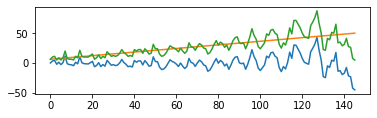

In [69]:
data_I = pd.read_csv('C:/Users/gorar/Desktop/w1/data/IV910324.DAT', names=['data'])
len_data = len(data_I)
x_I = list(range(0, len_data))
#a, b, c =  np.polyfit(x_I, data_I, 2)
#print(a,b,c)
I_delta, I_polyfit = deleted_trend(x_I, data_I, 1)

fig_delta = plt.figure()

subplot_delta = fig_delta.add_subplot(211)
line_delta = subplot_delta.plot(x_I, I_delta)  
line_polyfit = subplot_delta.plot(x_I, I_polyfit)
line_data = subplot_delta.plot(x_I, data_I)
path_delta = 'C:/Users/gorar/Desktop/w1/delta'
fig_delta.savefig(path_delta)

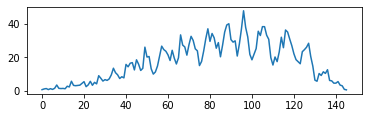

In [70]:
r = add_kaiser (data_I, 4)
x = list(range(0, len(r)))
fig_kaiser = plt.figure()

subplot_kaiser = fig_kaiser.add_subplot(211)
line_kaiser = subplot_kaiser.plot(x, r)  

# subplot_kaiser = fig_kaiser.add_subplot(212)
# line_kaiser = subplot_kaiser.plot(x, a)  
# print(r)

C:\Users\gorar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gorar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gorar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gorar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


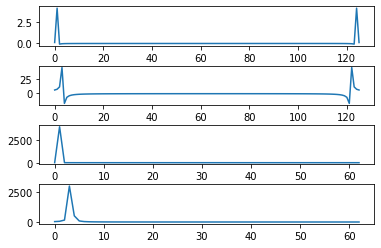

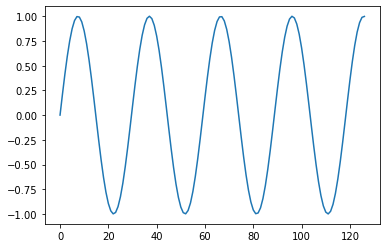

In [71]:
fig = plt.figure()
b = list(range (0,127))

b = [i/10 for i in b]

c =  np.sin(b)
b_2 = [i*2.124343 for i in b]
c2 = np.sin(b_2)
a = fft(c)
a2 = fft(c2)
a = a[1:]
a2 = a2[1:]
#print(a2)
a_p = power(a)
a_p_2 = power(a2)
subplot1 = fig.add_subplot(411)
line1 = subplot1.plot(a)
subplot2 = fig.add_subplot(412)
line2 = subplot2.plot(a2)

subplot3 = fig.add_subplot(413)
line3 = subplot3.plot(a_p)
subplot4 = fig.add_subplot(414)
line4 = subplot4.plot(a_p_2)

#rint(a)
fig2 = plt.figure()
subplot11 = fig2.add_subplot(111)
line1 = subplot11.plot(c2)


In [132]:
data_PC = pd.read_csv('C:/Users/gorar/Desktop/w1/index/index/PN199103.IAG', sep='|', skiprows= 14, encoding="utf-8-sig")
data_AE = pd.read_csv('C:/Users/gorar/Desktop/w1/index/index/ae1991.txt',   sep='\s+', header=None, encoding="utf-8-sig", skipinitialspace = True)
data_SYM = pd.read_csv('C:/Users/gorar/Desktop/w1/index/index/SYM1991.txt',   sep='\s+', header=None,  comment="%", encoding="utf-8-sig")

#import DATA for station SOD and subtract mean value
data_SOD =  pd.read_csv('C:/Users/gorar/Desktop/w1/dt/N.SOD', names=['data'], nrows = 1320)
data_SOD['data'] = data_SOD['data']-np.mean(data_SOD['data'])


In [133]:
DY_PC = 24
HR_PC_st = 2
HR_PC_end = 24


data_PC_DY = data_PC[data_PC[' DY']==24]
data_HR = data_PC_DY[(data_PC_DY[' HR'] >= HR_PC_st) & (data_PC_DY[' HR'] <= HR_PC_end)]
y_PC = data_HR['  PCN01']
start_time = "02:00"
finish_time = "23:59"
x_index = UT_time(start_time, finish_time)



C:\Users\gorar\anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


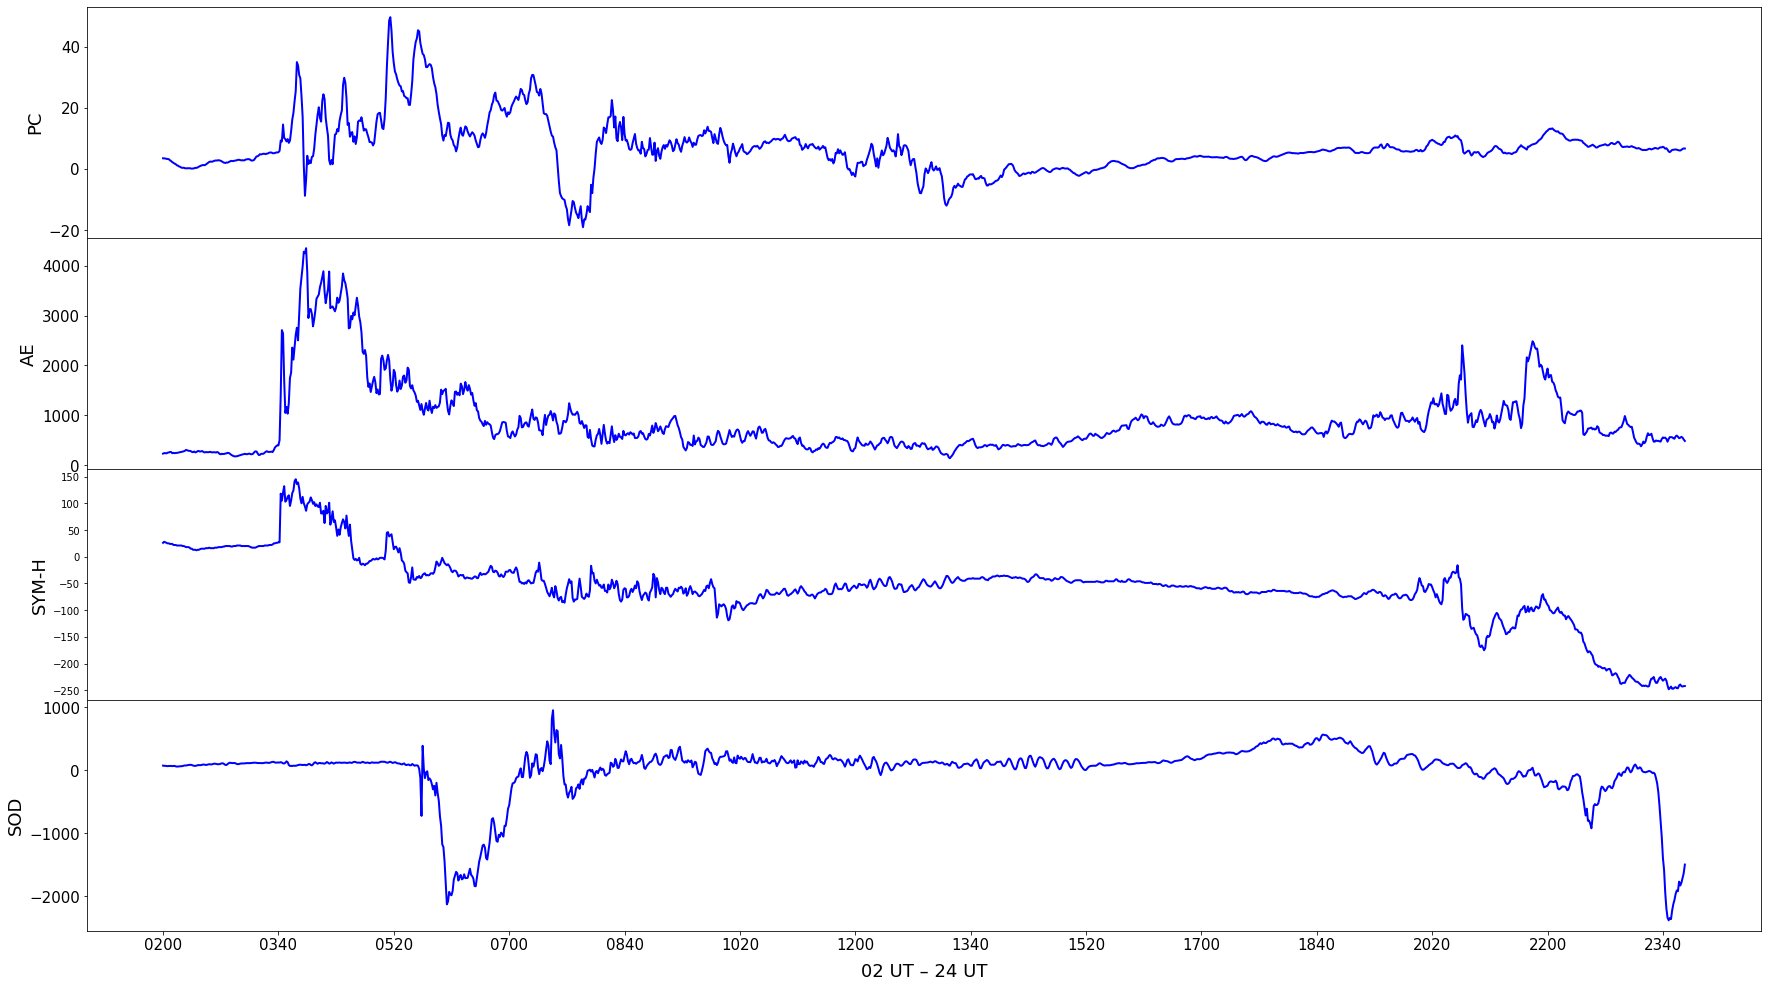

In [134]:
fig_index = plt.figure(figsize=(30, 17.))
#ploting PC

subplot_index_PC = fig_index.add_subplot(411)
subplot_index_PC.set_xticklabels('')
subplot_index_PC.set_ylabel(u'PC', fontsize=18)
line_index_PC = subplot_index_PC.plot(x_index, y_PC, '-', color='blue', linewidth=2)
plt.tick_params(axis='y', which='major', labelsize=15)

#ploting AE
name_index = 'AE'
name_month = '03'
name_day = '24'
name_letter = 'E'
name_year = '91'

name_hour_str = list(range(2, 24))
name_hour = ["%02d" % int(x) for x in name_hour_str]
name_AE_short = name_year+name_month+name_day+name_letter
name_AE = [name_AE_short + str(hour) for hour in name_hour] 
name_AE = [x + name_index for x in name_AE]

data_AE_selected = data_AE[data_AE[1].isin(name_AE)]
st = 19490
en = 19511
len_AE = len(data_AE_selected)
y_AE = pd.DataFrame()

for i in range(st, en+1):
    data_i_AE = data_AE_selected.loc[i]
    y_current = data_i_AE.iloc(axis=0)[3:63]
    y_AE = pd.concat([y_AE, y_current], ignore_index=True)


subplot_index_AE = fig_index.add_subplot(412)
subplot_index_AE.set_xticklabels('')
subplot_index_AE.set_ylabel(u'AE', fontsize=18)
line_index_AE = subplot_index_AE.plot(x_index, y_AE, '-', color='blue', linewidth=2)

plt.tick_params(axis='y', which='major', labelsize=15)

#ploting SYM
data_SYM_m = data_SYM[data_SYM[0]==3]
data_SYM_d = data_SYM_m[data_SYM[1]==24]
data_SYM_selected = data_SYM_d[data_SYM_d[2].isin(name_hour)]
y_SYM = data_SYM_selected[4]

subplot_index_SYM = fig_index.add_subplot(413)
# subplot_index_SYM.set_xticklabels('')
subplot_index_SYM.set_ylabel(u'SYM-H', fontsize=18)
line_index_SYM = subplot_index_SYM.plot(x_index, y_SYM, '-', color='blue', linewidth=2)



#ploting SOD
subplot_station_SOD = fig_index.add_subplot(414)
subplot_station_SOD.set_xlabel(u'02 UT – 24 UT', fontsize=18, labelpad = 10)
subplot_station_SOD.set_ylabel(u'SOD', fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=15)
subplot_station_SOD.xaxis.set_major_locator(ticker.MultipleLocator(100))
line_station_SOD = subplot_station_SOD.plot(x_index, data_SOD['data'], '-', color='blue', linewidth=2)

#delete distance between subplots
fig_index.subplots_adjust(wspace=0, hspace=0)
plt.tick_params(axis='y', which='major', labelsize=15)

#save
path3 = 'C:/Users/gorar/Desktop/w1/index'
fig_index.savefig(path3)


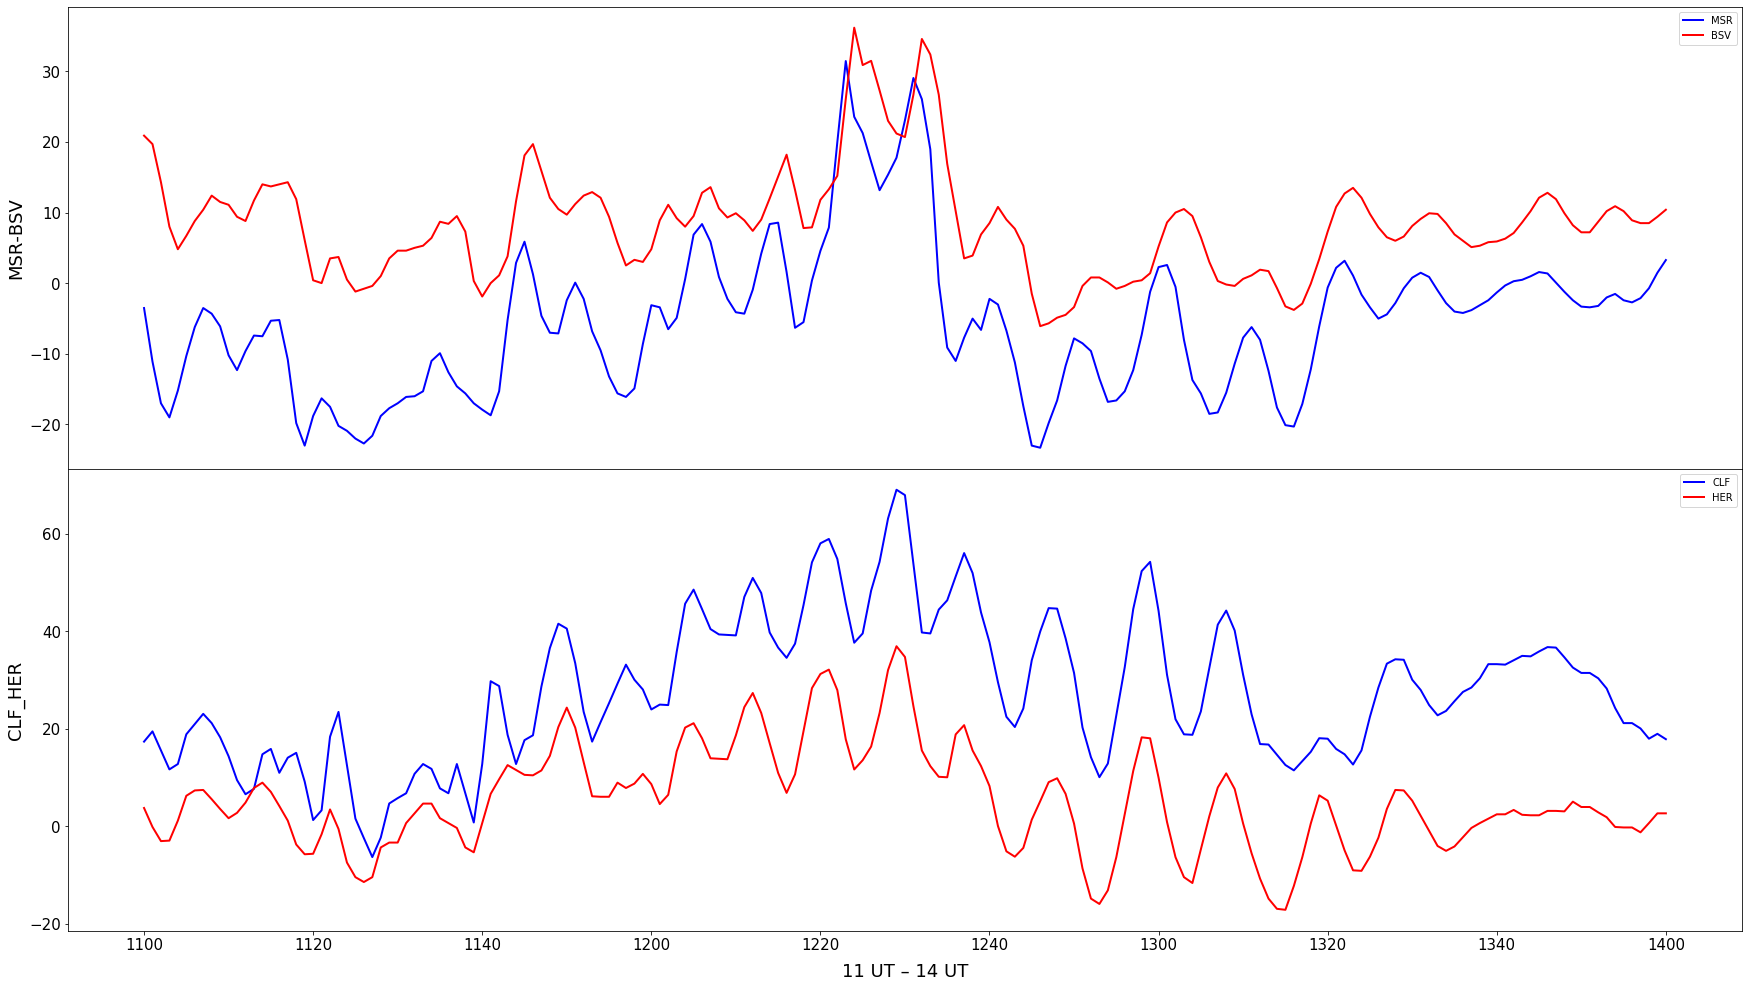

In [52]:
#ploting magnitrograms for associated stations MSR-BSV and CLF-HER 

#import data
data_MSR = pd.read_csv('C:/Users/gorar/Desktop/w1/data_her/N.MSR', names=['data'])
data_BSV = pd.read_csv('C:/Users/gorar/Desktop/w1/data_her/N.BSV', names=['data'])
data_CLF = pd.read_csv('C:/Users/gorar/Desktop/w1/data_her/N.CLF', names=['data'])
data_HER = pd.read_csv('C:/Users/gorar/Desktop/w1/data_her/N.HER', names=['data'])

#subtract mean values 

data_MSR['data'] = data_MSR['data'] - np.mean(data_MSR['data'])
data_BSV['data'] = data_BSV['data'] - np.mean(data_BSV['data'])
data_CLF['data'] = data_CLF['data'] - np.mean(data_CLF['data'])
data_HER['data'] = data_HER['data'] - np.mean(data_HER['data'])

#cut data
data_MSR = data_MSR.loc[660:840].reset_index(drop=True) 
data_BSV = data_BSV.loc[660:840].reset_index(drop=True)
data_CLF = data_CLF.loc[660:840].reset_index(drop=True)
data_HER = data_HER.loc[660:840].reset_index(drop=True)

#create time array

start_time_associate = "11:00"
finish_time_associate = "14:00"

array_time_associate = pd.date_range(start_time_associate, finish_time_associate, freq="1min").time
L_AT_associate = len(array_time_associate)
tim_associate = []

for y in range(L_AT_associate):
    time_H = array_time_associate[y].strftime('%H')
    time_M = array_time_associate[y].strftime('%M')
    M_H = str(time_H + time_M)
    tim_associate.append (M_H)

#plot MSR-BSV 

fig_associate = plt.figure(figsize=(30, 17.))


subplot_MSR_BSV  = fig_associate.add_subplot(211)
subplot_MSR_BSV.set_xticklabels('')
subplot_MSR_BSV.set_ylabel(u'MSR-BSV', fontsize=18)
line_MSR = subplot_MSR_BSV.plot(tim_associate, data_MSR , '-', color='blue', linewidth=2, label = 'MSR')
line_BSV = subplot_MSR_BSV.plot(tim_associate, data_BSV , '-', color='red', linewidth=2, label = 'BSV')
plt.tick_params(axis='y', which='major', labelsize=15)

# plt.grid()


plt.legend()
#plot CLF_HER
subplot_CLF_HER = fig_associate.add_subplot(212)
subplot_CLF_HER.set_xlabel(u'11 UT – 14 UT', fontsize=18, labelpad = 10)
subplot_CLF_HER.set_ylabel(u'CLF_HER', fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=15)
subplot_CLF_HER.xaxis.set_major_locator(ticker.MultipleLocator(20))

line_CLF = subplot_CLF_HER.plot(tim_associate, data_CLF, '-', color='blue', linewidth=2, label = 'CLF')
line_HER = subplot_CLF_HER.plot(tim_associate, data_HER, '-', color='red', linewidth=2, label = 'HER')

plt.legend()
#delete distance between subplots
fig_associate.subplots_adjust(wspace=0, hspace=0)
plt.tick_params(axis='y', which='major', labelsize=15)
# plt.grid()
#save
path4 = 'C:/Users/gorar/Desktop/w1/associate'
fig_associate.savefig(path4)


In [19]:
print(14*60)

840
